The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). 

In [1]:
#data analysis libraries 
import pandas as pd
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#ML Algorithm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score

Step 0 : Read and Explore the Titanic

In [25]:
#Load the files
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [26]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [27]:
#to check the number of rows and columns
df_train.shape

(891, 12)

In [28]:
# get the overview of the data types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
#to show the missing data percent
df_train.isna().sum()/len(df_train)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

from here we can see the missing % from each feature
 - Cabin 77.1%
 - Age 19.8%
 - Embarked 0.2%
From this missing feature, I will drop the Cabin feature as it missing more that 50%, for the age we will clean that up

Step 1 : Data Cleaning

In [7]:
df_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
#drop the Cabin, Ticket, Name and PassengerId Feature because we can't find any useful information from them
df_train = df_train.drop(['Cabin','Ticket','Name','PassengerId',], axis= 1)

In [9]:
#fill the missing Embarked feature by using the majority
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].value_counts().idxmax())

for the age its quite confusing, fortunately, the others feature is complete, so we can use other feature to predict the age rather than using the meadian/mean from Age feature of all passengers

In [10]:
df_train.groupby(['Parch','SibSp']).median()['Age']

Parch  SibSp
0      0        29.5
       1        30.0
       2        28.0
       3        31.5
1      0        27.0
       1        30.5
       2         4.0
       3         3.0
       4         7.0
2      0        20.5
       1        24.0
       2        19.5
       3        10.0
       4         6.0
       5        11.0
       8         NaN
3      0        24.0
       1        48.0
       2        24.0
4      0        29.0
       1        45.0
5      0        40.0
       1        39.0
6      1        43.0
Name: Age, dtype: float64

now we can use the mean age from the goup of Parch and SibSp feature, rather than the mean of all passengers. However, there a small problem where the Parch of 3 and SibSp of 8 have missing value, for the simplicity, we can fill it manually by using the Parch 2 and SibSp 5

In [11]:
#fill the missing value based on the group of Parch and SibSp
df_train['Age'] = df_train.groupby(['Parch','SibSp'])['Age'].apply(lambda x: x.fillna(x.median()))

#manually fill the missing value using the Parch 2 and SibSp 5
df_train['Age'] = df_train['Age'].fillna(11)

In [12]:
#to check once again if we have any missing value
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Step 2 : Data Exploratory

let's explore our Titanic using simple data visualization

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

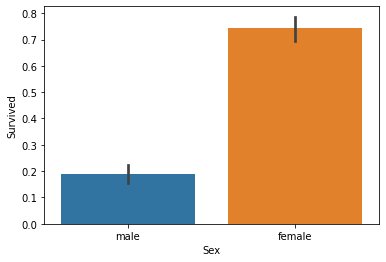

In [38]:
sns.barplot(x='Sex',y='Survived', data=df_train)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

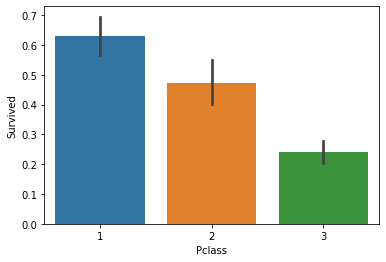

In [45]:
sns.barplot(x='Pclass',y='Survived', data=df_train)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

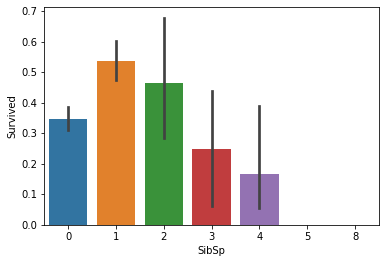

In [40]:
sns.barplot(x='SibSp', y="Survived", data=df_train)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

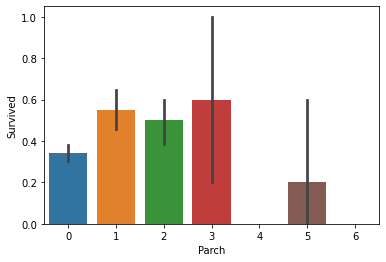

In [41]:
sns.barplot(x='Parch', y="Survived", data=df_train)

Step 3 : Data Processing

In [13]:
#some of this Feature isn't integer, we need to change that with the help of Label Encoder
le = LabelEncoder()

for col in df_train.columns.values:
    if df_train[col].dtype =='object':
        df_train[col]=le.fit_transform(df_train[col])

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


In [15]:
#split the data to train the machine learning
predictors = df_train.drop(['Survived'], axis=1)
target = df_train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.25, random_state = 0)

In [16]:
#using min max scaler to scale the data
scaler = MinMaxScaler()
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

Step 4 : Machine Learning

Logistic Regression

In [17]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred_cv1 = logreg.predict(X_test)
acc_logreg = accuracy_score(y_test, pred_cv1) * 100
print(acc_logreg)

79.37219730941703


c:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


K-Nearest Neighbors

In [18]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred_cv2 = knn.predict(X_test)
acc_knn = accuracy_score(y_test, pred_cv2) * 100
print(acc_knn)

71.30044843049326


Decision Tree

In [19]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred_cv3 = dt.predict(X_test)
acc_tree = accuracy_score(y_test, pred_cv3) * 100
print(acc_tree)

75.7847533632287


SVM

In [20]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
pred_cv4 = svm_model.predict(X_test)
acc_svm = accuracy_score(y_test, pred_cv4) * 100
print(acc_svm)

71.74887892376681


Random Forest

In [21]:
rf = RandomForestClassifier(max_depth=1)
model_rf = rf.fit(X_train, y_train)
pred_cv5 = rf.predict(X_test)
acc_rf = accuracy_score(y_test, pred_cv5) * 100
print(acc_rf)

79.37219730941703


Naive Bayes

In [22]:
nb = GaussianNB()
nb.fit(X_train, y_train)
pred_cv6 = rf.predict(X_test)
acc_nb = accuracy_score(y_test, pred_cv6) * 100
print(acc_nb)

79.37219730941703


In [23]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','K-Nearest Neighbors','Decision Tree','SVM','Random Forest','Naive Bayes'],
    'Score': [acc_logreg,acc_knn,acc_tree,acc_svm,acc_rf,acc_nb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,79.372197
4,Random Forest,79.372197
5,Naive Bayes,79.372197
2,Decision Tree,75.784753
3,SVM,71.748879
1,K-Nearest Neighbors,71.300448


Step 5 : Conclusion

from simple data visualization, we can see that society priotize women, someone with higher Social economy, and those with family, siblings or parent choose to be together with their family until the end

so if you want to travel with another "titanic", make sure that you're a Women, have high Social Economy Class, and didn't have anyone so you can have a higher chance to survive